In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv("/content/ai_resume_screening.csv")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   years_experience    30000 non-null  int64  
 1   skills_match_score  30000 non-null  float64
 2   education_level     30000 non-null  object 
 3   project_count       30000 non-null  int64  
 4   resume_length       30000 non-null  int64  
 5   github_activity     30000 non-null  int64  
 6   shortlisted         30000 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.6+ MB


In [32]:
df.head()

,years_experience,skills_match_score,education_level,project_count,resume_length,github_activity,shortlisted
0,6,84.7,Bachelors,7,234,158,No
1,3,59.1,Masters,5,502,77,No
2,12,100.0,Masters,12,753,381,Yes
3,14,66.8,High School,8,529,407,Yes
4,10,99.6,Bachelors,10,754,331,Yes


In [33]:
df.describe()

,years_experience,skills_match_score,project_count,resume_length,github_activity
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,7.506567,73.682653,10.646267,572.584700,325.260667
std,4.624104,16.765909,4.634047,178.709918,159.951803
min,0.000000,0.500000,0.000000,150.000000,0.000000
25%,3.750000,62.100000,7.000000,441.000000,202.000000
50%,7.000000,74.300000,10.000000,574.000000,321.000000
75%,12.000000,86.500000,14.000000,709.000000,443.000000
max,15.000000,100.000000,25.000000,900.000000,842.000000


In [34]:
df['education_level'].value_counts()

,count
education_level,
Bachelors,13461
Masters,10524
PhD,3024
High School,2991


In [35]:
num_col = df.select_dtypes(include = ['int64', 'float64']).columns
df[num_col].corr()

,years_experience,skills_match_score,project_count,resume_length,github_activity
years_experience,1.000000,0.514022,0.689833,0.759848,0.828805
skills_match_score,0.514022,1.000000,0.382246,0.390144,0.441404
project_count,0.689833,0.382246,1.000000,0.523929,0.874043
resume_length,0.759848,0.390144,0.523929,1.000000,0.631059
github_activity,0.828805,0.441404,0.874043,0.631059,1.000000


In [36]:
df['shortlisted'].value_counts(normalize=True)

,proportion
shortlisted,
Yes,0.698867
No,0.301133


In [37]:
df['shortlisted'] = df['shortlisted'].map({'Yes': 1, 'No': 0})

In [38]:
edu_map = {
    'High School': 0,
    'Bachelors': 1,
    'Masters': 2,
    'PhD': 3
}
df['education_level'] = df['education_level'].map(edu_map)

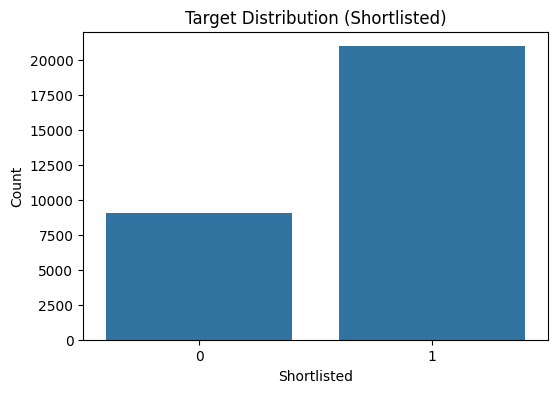

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='shortlisted', data=df)
plt.title("Target Distribution (Shortlisted)")
plt.xlabel("Shortlisted")
plt.ylabel("Count")
plt.show()

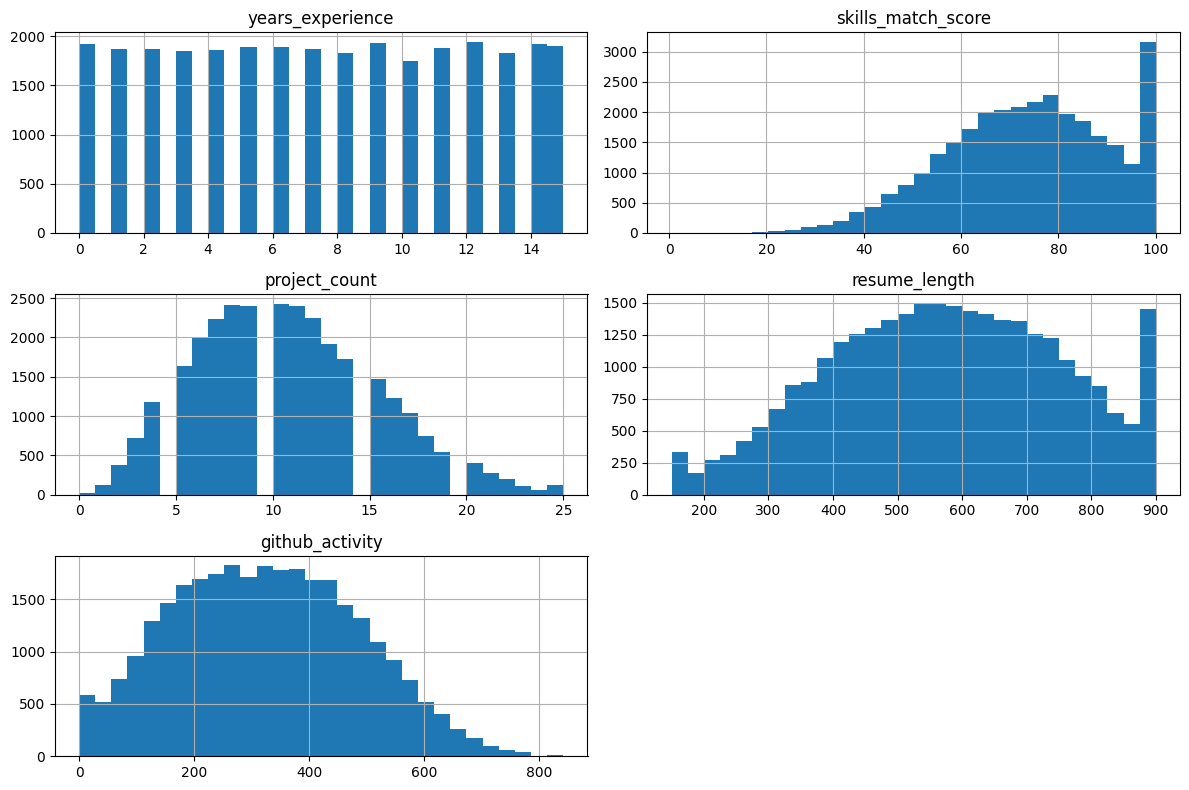

In [40]:
num_cols = ['years_experience', 'skills_match_score',
            'project_count', 'resume_length', 'github_activity']

df[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

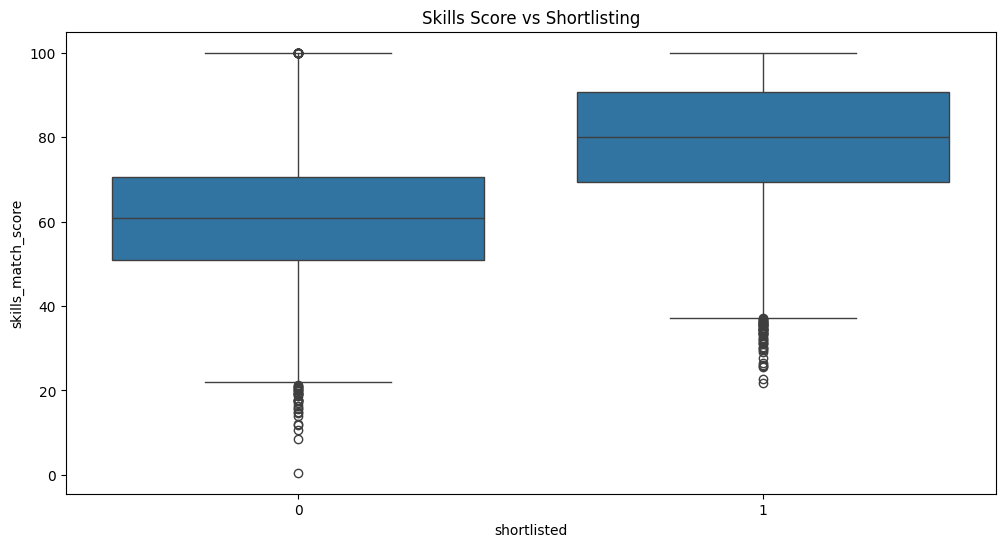

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(x='shortlisted', y='skills_match_score', data=df)
plt.title("Skills Score vs Shortlisting")
plt.show()

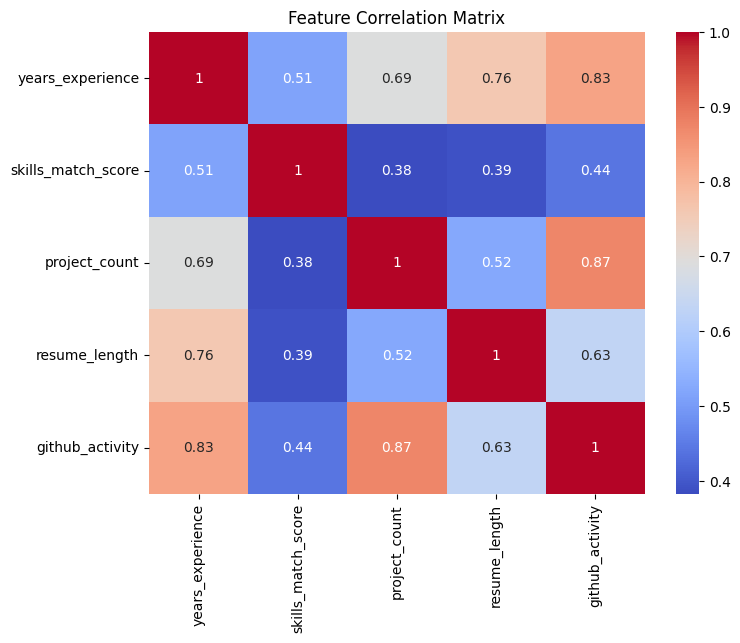

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [43]:
X = df.drop('shortlisted', axis=1)
y = df['shortlisted']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [44]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1807
           1       0.96      0.88      0.92      4193

    accuracy                           0.89      6000
   macro avg       0.86      0.89      0.88      6000
weighted avg       0.90      0.89      0.89      6000

ROC AUC: 0.9649407773859799


In [46]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1807
           1       0.92      0.94      0.93      4193

    accuracy                           0.90      6000
   macro avg       0.89      0.87      0.88      6000
weighted avg       0.90      0.90      0.90      6000

ROC AUC: 0.9626269228063586


In [47]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8903333333333333


In [48]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9011666666666667


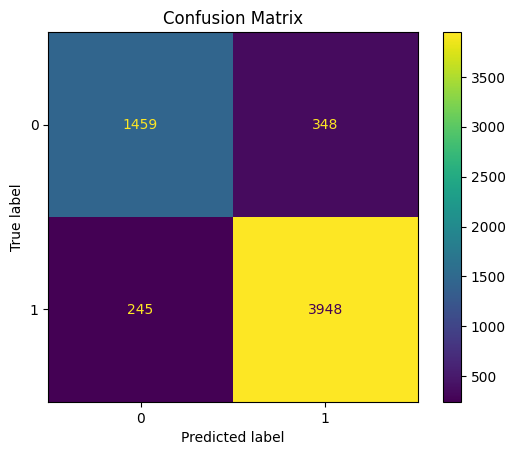

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Confusion Matrix")
plt.show()

In [50]:
feat_imp = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feat_imp

,0
years_experience,0.297645
github_activity,0.240999
project_count,0.155064
skills_match_score,0.151895
resume_length,0.123691
education_level,0.030706


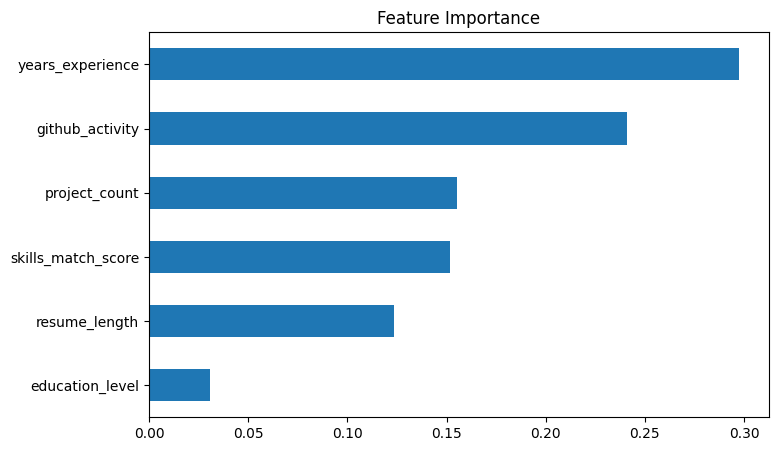

In [51]:
feat_imp.plot(kind='barh', figsize=(8,5))
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

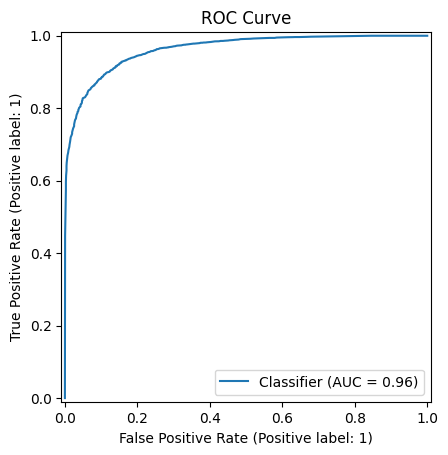

In [52]:
RocCurveDisplay.from_predictions(y_test, y_prob_rf)
plt.title("ROC Curve")
plt.show()